In [1]:
import pandas as pd

train = pd.read_csv("train.csv")
print(train.head(n=10))  # 10개만 보길 원할 때
print(train.describe())  # 주요 통계 지표를 반환

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male  54

- 수치적 데이터의 통계를 보여주는 함수

In [2]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Age에 NaN이라고 있는 부분이 있음. 평균 나이를 넣는다.

In [3]:
train['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [4]:
age_mean = train['Age'].mean()
age_mean

np.float64(29.69911764705882)

In [5]:
train['Age'] = train['Age'].fillna(age_mean)
train['Age']

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

X에 사용할 Features 선별

In [6]:
featrues = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch','Fare', 'Embarked']
X = train[featrues]
train[featrues]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.000000,1,0,7.2500,S
1,1,female,38.000000,1,0,71.2833,C
2,3,female,26.000000,0,0,7.9250,S
3,1,female,35.000000,1,0,53.1000,S
4,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.000000,0,0,13.0000,S
887,1,female,19.000000,0,0,30.0000,S
888,3,female,29.699118,1,2,23.4500,S
889,1,male,26.000000,0,0,30.0000,C


Sex, Embarked는 범주형 데이터임 --> one hot encoding 사용

In [7]:
print(pd.get_dummies(X))
X = pd.get_dummies(X)

     Pclass        Age  SibSp  Parch     Fare  Sex_female  Sex_male  \
0         3  22.000000      1      0   7.2500       False      True   
1         1  38.000000      1      0  71.2833        True     False   
2         3  26.000000      0      0   7.9250        True     False   
3         1  35.000000      1      0  53.1000        True     False   
4         3  35.000000      0      0   8.0500       False      True   
..      ...        ...    ...    ...      ...         ...       ...   
886       2  27.000000      0      0  13.0000       False      True   
887       1  19.000000      0      0  30.0000        True     False   
888       3  29.699118      1      2  23.4500        True     False   
889       1  26.000000      0      0  30.0000       False      True   
890       3  32.000000      0      0   7.7500       False      True   

     Embarked_C  Embarked_Q  Embarked_S  
0         False       False        True  
1          True       False       False  
2         False      

In [8]:
y = train['Survived']

Scikit-Learn의 Decision Tree

In [9]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree 생성
model = DecisionTreeClassifier(max_depth=3)
model.fit(X.values, y)

# 예측 정확도 측정
(model.predict(X.values) == y.values).mean()  # 모델이 예측한 결과와 실제 결과의 차이의 평균

np.float64(0.8271604938271605)

트리를 보고 싶을 때

[Text(0.5, 0.875, 'Sex_male <= 0.5\ngini = 0.473\nsamples = 891\nvalue = [549, 342]\nclass = Died'),
 Text(0.25, 0.625, 'Pclass <= 2.5\ngini = 0.383\nsamples = 314\nvalue = [81.0, 233.0]\nclass = Survived'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'Age <= 2.5\ngini = 0.1\nsamples = 170\nvalue = [9, 161]\nclass = Survived'),
 Text(0.0625, 0.125, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = Died'),
 Text(0.1875, 0.125, 'gini = 0.091\nsamples = 168\nvalue = [8, 160]\nclass = Survived'),
 Text(0.375, 0.375, 'Fare <= 23.35\ngini = 0.5\nsamples = 144\nvalue = [72, 72]\nclass = Died'),
 Text(0.3125, 0.125, 'gini = 0.484\nsamples = 117\nvalue = [48, 69]\nclass = Survived'),
 Text(0.4375, 0.125, 'gini = 0.198\nsamples = 27\nvalue = [24, 3]\nclass = Died'),
 Text(0.75, 0.625, 'Age <= 6.5\ngini = 0.306\nsamples = 577\nvalue = [468, 109]\nclass = Died'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'SibSp <= 2.5\ngini = 0.444\nsamples = 24\nvalue = [8, 16]\nclass = Survived'),

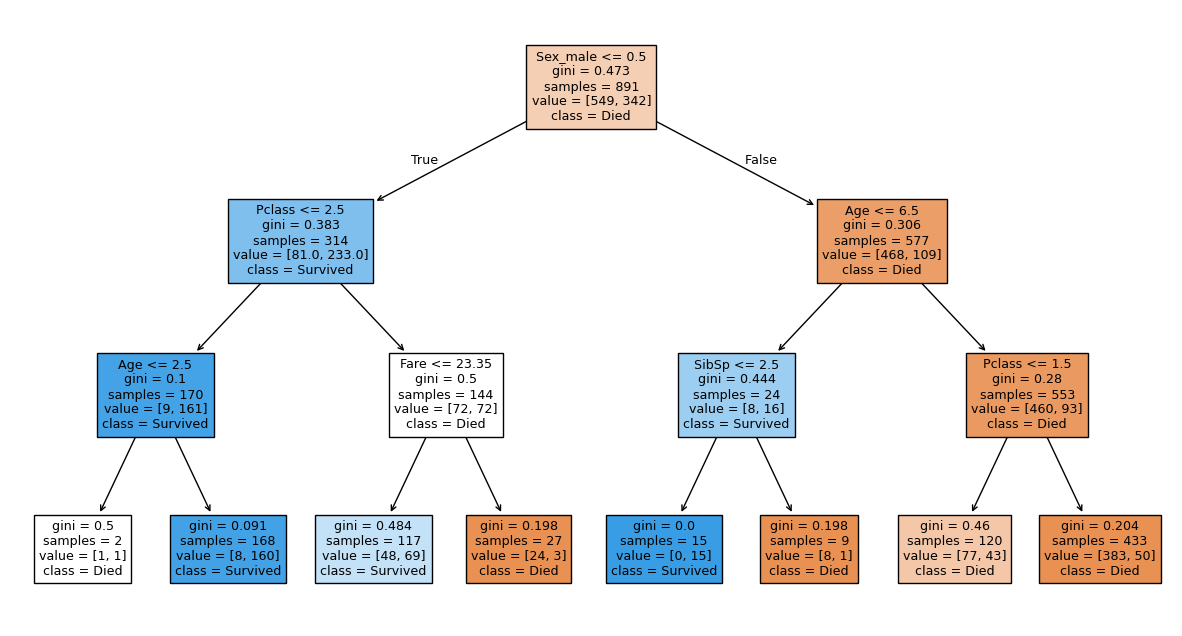

In [10]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(15,8))
tree.plot_tree(model, feature_names=X.columns, class_names=['Died', 'Survived'], filled=True)

직접 구현

- gini : 불순도
- n_samples : 샘플의 개수
- n_samples_per_class : 생존/사망자 인원 수
- predicted_class : 사망

In [11]:
class Node:
    def __init__(self, gini, n_samples, n_samples_per_class, predicted_class):
        self.gini = gini
        self.n_samples = n_samples
        self.n_samples_per_class = n_samples_per_class
        self.predicted_class = predicted_class
        self.feature_index = -1
        self.threshold = -1
        self.left = None
        self.right = None
        

In [12]:
import numpy as np

class DecisionTreeClassifier():
    def __init__(self, max_depth=3) -> None:
        self.max_depth = max_depth
        self.tree = None


    def fit(self, X, y):
        self.tree = self.build_tree(X, y, self.max_depth)

    def predict(self, X):
        return np.array([self.predict_one(x) for x in X])
    
    def gini(self, y):
        n_samples = len(y)
        n_samples_per_class = np.bincount(y)
        gini = 1.0
        for i in range(len(n_samples_per_class)):
            gini -= (n_samples_per_class[i] / n_samples) ** 2

        return gini
    
    def find_best_split(self, X, y):
        n_samples, n_features = X.shape
        best_gini = 1.0
        best_feature = -1
        best_threshold = -1

        for feature in range(n_features):
            thresholds = np.unique(X[:, feature])

            for threshold in thresholds:
                left_indices = X[:, feature] < threshold
                right_indices = ~left_indices

                left_gini = self.gini(y[left_indices])
                right_gini = self.gini(y[right_indices])

                gini = (left_gini * np.sum(left_indices) + right_gini * np.sum(right_indices)) / n_samples
                
                if gini < best_gini:
                    best_gini = gini
                    best_feature = feature
                    best_threshold = threshold

        return best_feature, best_threshold
    
    def build_tree(self, X, y, depth):
        if depth < 0:
            return None
        n_samples_per_class=np.bincount(y)
        node = Node(
            gini=self.gini(y),
            n_samples=len(y),
            n_samples_per_class=n_samples_per_class,
            predicted_class=np.argmax(n_samples_per_class)
            )

        if node.gini == 0:
            return node
        
        best_feature, best_threshold = self.find_best_split(X, y)

        node.feature_index = best_feature
        node.threshold = best_threshold

        left_indices = X[:, best_feature] < best_threshold
        right_indices = ~left_indices

        node.left = self.build_tree(X[left_indices], y[left_indices], depth - 1)
        node.right = self.build_tree(X[right_indices], y[right_indices], depth - 1)

        return node

    def predict_one(self, x):
        node = self.tree
        while node.left is not None:
            if x[node.feature_index] < node.threshold:
                node = node.left
            else:
                node = node.right
        return node.predicted_class

In [13]:
# Decision Tree 생성
model = DecisionTreeClassifier()
model.fit(X.values, y.values)
# 예측 정확도 측정
(model.predict(X.values) == y.values).mean()


np.float64(0.8271604938271605)

In [14]:
# test = pd.read_csv("test.csv")
# test['Age'] = test['Age'].fillna(age_mean)

# X_test = test[featrues]
# X_test = pd.get_dummies(X_test)

# predictions = model.predict(X_test.values)

# output = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': predictions})
# output.to_csv('submission.csv', index=False)
